# <p style="text-align:center;">Linear Regression using Sk-Learn</p>
---
*<p style="text-align:right;">Reference: Machine Learning by Andrew Ng.</p>*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

## Assumptions of Linear Regression

There are four assumptions associated with a linear regression model:

- <b>Linearity</b>: The relationship between X and the mean of Y is linear.
- <b>Homoscedasticity</b>: The variance of residual is the same for any value of X. It is an assumption of equal or similar variances in different groups being compared. This is an important assumption of parametric statistical tests because they are sensitive to any dissimilarities. Uneven variances in samples result in biased and skewed test results.
- <b>Independence</b>: Observations are independent of each other.
- <b>Normality</b>: For any fixed value of X, Y is normally distributed.

## California Housing Dataset
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

* Number of Instances : 20640
* Number of Attributes : 8 numeric, predictive attributes and the target
* MedInc : median income in block group
* HouseAge : median house age in block group
* AveRooms : average number of rooms per household
* AveBedrms : average number of bedrooms per household
* Population : block group population
* AveOccup : average number of household members
* Latitude : block group latitude
* Longitude : block group longitude
* Missing Attribute Values : None

In [3]:
X,y = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

In [4]:
df = pd.concat([X,y], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print("Shape of X: " + str(X.shape))
print("Shape of Y: " + str(y.shape))

Shape of X: (20640, 8)
Shape of Y: (20640,)


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Almost all the features have outliers. Median Income has avg. value of \\$38,70,671 but the maximum value is \\$1,50,00,100. House age has avg. value of 28.6 years but maximum value is 52 years, and so on.

<AxesSubplot:>

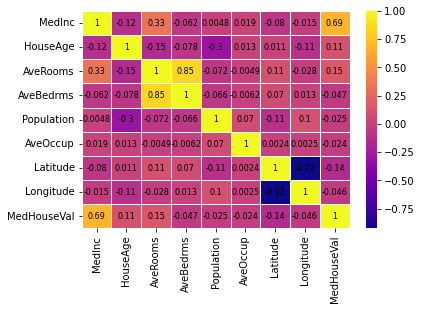

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, annot_kws = {'color':'black','size' : 8}, cmap = 'plasma', linewidth = 1)

Not much of the features seem to be correlated, so we would have to use all the features here, Multiple Linear Regression that is. Also, we are not going to perform any kind of feature engineering. A thing to mark is that Median House Income and Median House Value have a correlation $ \approx $ 0.7. So dropping one of the features will be helpful for learning. But here we will use all the features instead just for the sake of implementation. Trying to visualize the 2D analogue of the dataset, we can say that: 

Our training data set is scattered on the x-y plane. We are trying to make a straight line (defined by $ ℎ_𝜃(𝑥^{(𝑖)}) $) which passes through these scattered data points.

<blockquote><em>Idea: Choose, paramenters $ \theta : (\theta_0 , \theta_1, ..., \theta_n)\in \mathbb{R}^{n+1} $, so that $ ℎ_𝜃(𝑥) $ is close to 𝑦 for our training examples (𝑥, 𝑦).</em></blockquote>

 We now introduce notation for equations where we can have any number of input variables.
 
 $ \large x_j ^{(i)} $ = Value of feature $ j $ in $ i^{th} $ training example
<br>$ \large x^{(i)} $ = feature value vector of $ i^{th} $ training example = $ \begin{bmatrix} x^{(i)}_0  & x^{(i)}_1 & x^{(i)}_2 & \ldots & x^{(i)}_n \end{bmatrix} \in \mathbb{R}^{n+1} $ , extra bias feature $ x^{(i)}_0 = 1 $
<br>$ \large m $ = # Training Examples = 14,450 here ,i.e, 70% of all the 20,640 instances 
<br>$ \large n $ = # Features (8 here, excluding the o/p feature)
<br>$ \large h(x^{(i)}) $ = prediction of price of $ i^{th} $ training example

<center><br><br> 
    $ \large X_{train} = \begin{bmatrix} \longleftarrow x^{(0)} \longrightarrow \\ \longleftarrow x^{(1)} \longrightarrow \\ \longleftarrow x^{(2)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(14,450)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{train} = \begin{bmatrix}y^{(0)} \\ y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(14,450)} \end{bmatrix} $ 
    $ \large H_{train} = \begin{bmatrix}h(x^{(0)}) \\ h(x^{(1)}) \\ h(x^{(2)}) \\ \vdots \\ h(x^{(14,450)}) \end{bmatrix} $ <br><br>
    $ \large X_{test} = \begin{bmatrix} \longleftarrow x^{(14,451)} \longrightarrow \\ \longleftarrow x^{(14,452)} \longrightarrow \\ \longleftarrow x^{(14,453)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(20,639)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{test} = \begin{bmatrix}y^{(14,451)} \\ y^{(14,452)} \\ y^{(14,453)} \\ \vdots \\ y^{(20,639)} \end{bmatrix} $ $ \large H_{test} = \begin{bmatrix}h(x^{(14,451)}) \\ h(x^{(14,452)}) \\ h(x^{(14,453)}) \\ \vdots \\ h(x^{(20,639)}) \end{bmatrix} $</center>


---
# Using Sk-Learn

## No Regularization
`LinearRegression` fits a linear model with coefficients $ w = (w_1, w_2, ..., w_p) $ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

<center>$ \large \min_{w} || X w - y||_2^2 $</center>

$ ||Xw-y||_2 $ represents $ \ell_2 $ norm of $ Xw - y $

In [8]:
from sklearn import linear_model

`LinearRegression` will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:
- `fit_intercept` : The function takes `fit_intercept` as a boolean value (default - True) so as to whether to calculate the intercept term for the model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered, i.e, normalized). 
- `normalize` : The function takes `normalize` as a boolean value(default - false) so as to whether normalize the data before fitting the model. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, use `StandardScaler` before calling fit on an estimator with `normalize=False`.

`fit_intercept` and `normalize` go hand-in-hand. If one is `True` other must be `False`. Here we are not scaling the dataset


- `positive` : When set to True (default - False), forces the coefficients to be positive. This option is only supported for dense arrays.

In [9]:
regr = linear_model.LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

Scaling the data using `StandardScaler()`

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_transformed = scaler.fit_transform(X_train)

Fitting on the dataset is done with `.fit` method. 

In [14]:
model = regr.fit(X_train_transformed, y_train)

Coefficients of 'fitted' model can be fetched with `.coef` and `.intercept` methods:

In [15]:
model.coef_

array([ 8.49221760e-01,  1.22119309e-01, -2.99558449e-01,  3.48409673e-01,
       -8.84488134e-04, -4.16980388e-02, -8.93855649e-01, -8.68616688e-01])

In [16]:
model.intercept_

2.0692396089424165

Making predictions on test set using `.predict` method. Note that the test dataset must be `transform`ed and not `fit`ted before predicting otherwise it may lead to inconsistent pre-processing

In [17]:
X_test_transformed = scaler.transform(X_test)

In [18]:
y_pred = model.predict(X_test_transformed) #same as H_test

In [19]:
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [20]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: MedHouseVal, Length: 6192, dtype: float64

Furthermore, we can report the mean squared error, and R squared metrics:

In [21]:
model.score(X_test_transformed, y_test)

0.5957702326061664

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
MSE = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test,y_pred)

In [24]:
print('MSE: %.2f' % MSE)
print('R^2: %.2f' % r2score) #can also use model.score

MSE: 0.53
R^2: 0.60


The least squares solution is computed using the singular value decomposition of X. If X is a matrix of shape `(n_samples, n_features)` this method has a cost of 

$ \large O(n_{samples} n_{features}^2) $ or $ \large O(mn^2) $

## $L_1$-Regularization or Lasso Regression

Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso(least absolute shrinkage and selection operator) is:

<center>$ \large \min_{w} || X w - y||_2^2 + \alpha ||w||_2 $

In [25]:
regl = linear_model.Lasso(alpha = 0.02) 

In [26]:
regl_fit = regl.fit(X_train_transformed, y_train)

In [27]:
print("Coefficients: \n" , regl_fit.coef_)
print("\nIntercept:\t %.2f" %regl_fit.intercept_)

Coefficients: 
 [ 0.74066563  0.13010627 -0.02386819  0.06944695  0.         -0.02064872
 -0.68675402 -0.6459667 ]

Intercept:	 2.07


In [28]:
y_pred = regl.predict(X_test_transformed)

In [29]:
y_pred

array([0.86091486, 1.7043388 , 2.41730458, ..., 1.90869354, 1.63161365,
       1.68709363])

In [30]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: MedHouseVal, Length: 6192, dtype: float64

In [31]:
print("MSE : %.2f" %mean_squared_error(y_test, y_pred))
#2 ways of calculating r2 score
print("R2 Score : %.2f" %regl_fit.score(X_test_transformed,y_test)) 
print("R2 Score : %.2f" %r2_score(y_test, y_pred))

MSE : 0.54
R2 Score : 0.59
R2 Score : 0.59


## $L_2$-Regularization or Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares. Thus its same as regularization, alpha here is same as lambda of cost function:

<center>$ \large \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $

In [32]:
#note the difference in alpha of both the regressions
regr = linear_model.Ridge(alpha = .5)

In [33]:
regr_fit = regr.fit(X_train_transformed,y_train)

In [34]:
print("Coefficients: \n" , regr_fit.coef_)
print("\nIntercept:\t %.2f" %regr_fit.intercept_)

Coefficients: 
 [ 8.49187003e-01  1.22163915e-01 -2.99433851e-01  3.48256073e-01
 -8.69308401e-04 -4.17002422e-02 -8.93429192e-01 -8.68184187e-01]

Intercept:	 2.07


In [35]:
y_pred = regr.predict(X_test_transformed)

In [36]:
y_pred

array([0.72624432, 1.76733713, 2.71071857, ..., 2.07455396, 1.57379547,
       1.82736305])

In [37]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: MedHouseVal, Length: 6192, dtype: float64

In [38]:
print("MSE : %.2f" %mean_squared_error(y_test, y_pred))
#2 ways of calculating r2 score
print("R2 Score : %.2f" %regr_fit.score(X_test_transformed,y_test)) 
print("R2 Score : %.2f" %r2_score(y_test, y_pred))

MSE : 0.53
R2 Score : 0.60
R2 Score : 0.60


This method has the same order of complexity as Ordinary Least Squares.

## Elastic Net Regression

Linear regression with combined L1 and L2 priors as regularizer. The lasso penalty function has several limitations. For example, in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others. To overcome these limitations, the elastic net adds a quadratic part to the penalty, which when used alone is ridge regression. The estimates from the elastic net method are defined by

<center>$ \large \min_{w} || X w - y||_2^2 + \lambda_1 ||w||_2 + \lambda_2 ||w||_2^2 $</center>
    
<br>
The quadratic penalty term makes the loss function strongly convex, and it therefore has a unique minimum. The elastic net method includes the LASSO and ridge regression: in other words, each of them is a special case where 

$$
\large \lambda_{1}=\lambda ,\lambda_{2}=0 \ or \lambda_1 = 0, \lambda_2 = \lambda   
$$

In [39]:
from sklearn.linear_model import ElasticNet

Selected alpha = 2.85 after several trials

In [40]:
rege = linear_model.ElasticNet(alpha = 2.85, random_state = 42)

In [41]:
rege_fit = rege.fit(X_train, y_train)

In [42]:
print("Coefficients: \n" , rege_fit.coef_)
print("\nIntercept:\t %.2f" %rege_fit.intercept_)

Coefficients: 
 [ 1.86339500e-02  5.69730713e-04  0.00000000e+00 -0.00000000e+00
 -2.18644376e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]

Intercept:	 2.01


In [43]:
y_pred = rege.predict(X_test_transformed)

In [44]:
y_pred

array([1.9902984 , 1.99883696, 2.00911713, ..., 2.00773206, 2.00879335,
       2.00329454])

In [45]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: MedHouseVal, Length: 6192, dtype: float64

In [46]:
print("MSE : %.2f" %mean_squared_error(y_test, y_pred))
#2 ways of calculating r2 score
print("R2 Score : %.2f" %rege_fit.score(X_test_transformed,y_test)) 
print("R2 Score : %.2f" %r2_score(y_test, y_pred))

MSE : 1.29
R2 Score : 0.02
R2 Score : 0.02
